# Laboratorio 3. Deep learning (Ej1 manuscritos)

Andres Emilio Quinto 18288
Andree Toledo 18439

## Instrucciones
Utilice el data set [Digit Recognizer. Learn computer vision fundamentals with the famous MNIST data](https://www.kaggle.com/c/digit-recognizer) de  la  competencia  de Kaggle. Debe  hacer  un  análisis  exploratorio  para  entender  mejor  los datos, sabiendo que el objetivo final es reconocer el carácter que se muestra en la imagen. Recuerde explicar  biencada  uno  de  los  hallazgos  que  haga.La  forma  más  organizada  de  hacer  un  análisis exploratorio  es  generando  ciertas  preguntas  de  las  líneas  que  le  parece  interesante  investigar.Genere un informe con las explicaciones de los pasos que llevó a cabo y los resultados obtenidos. Recuerde  que  la  investigación  debe  ser  reproducible  por  lo  que  debe  guardarel  código  que  ha utilizado  para  resolver  los  ejerciciosy/o  cada  uno  de  los  pasos  llevados  a  cabo  si  utiliza  una herramienta visual. El objetivo es hacer un programa que reconozca caracteres manuscritos.

- - -
### Importación de librerías necesarias para el análisis y algoritmos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline     
sns.set(color_codes=True)

- - -
# Análisis exploratorio

Mediante pandas se carga el archivo csv que contiene el [dataset](https://www.kaggle.com/c/digit-recognizer/data).

In [2]:
df = pd.read_csv("train.csv")
# Se muestran las primeras 5 filas
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.tail(5)          
# Se muestran las últimas5 filas

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.max()

label        9
pixel0       0
pixel1       0
pixel2       0
pixel3       0
            ..
pixel779    62
pixel780     0
pixel781     0
pixel782     0
pixel783     0
Length: 785, dtype: int64

Se obtienen los tipos de datos de las variables. Se observa que para todas ellas, el tipo es int64. Es decir, todos los datos son números enteros.

In [5]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

El dataset cuenta entonces con 785 columnas, siendo la primera de ellas la variable *label*, la cual indica el dígito que fue dibujado por el usuario. Para el resto de columnas, estas representan los valores de los 784 pixeles de una imagen de 28x28. Los valores de los pixeles contienen un número entero que puede ir desde 0 a 255.

En total se tienen cuarenta y dos mil (42,000) filas y 785 columnas.

In [6]:
df.shape

(42000, 785)

La tabla siguiente tabla de frecuencia muestra que los tres dígitos más escritos fueron el *1*,*7* y *3*.

In [7]:
table = df.groupby("label").size().reset_index(name="Frecuencia").sort_values(['Frecuencia'], ascending=False)
table

,label,Frecuencia
1,1,4684
7,7,4401
3,3,4351
9,9,4188
2,2,4177
6,6,4137
0,0,4132
4,4,4072
8,8,4063
5,5,3795


A continuación se muestra una gráfica de barras que demuestra lo antes mencionado

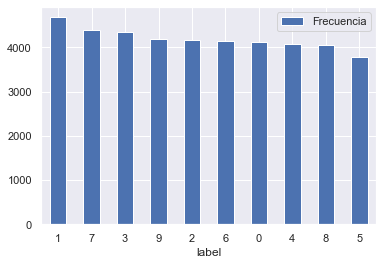

In [8]:
ax = table.plot.bar(x='label', y='Frecuencia', rot=0)

- - - 
# Aplicación de modelos

## Red neuronal simple

A continuación se asginan a *x*los valores de los 784 pixeles de las imágenes y a *y* las etiquetas con los dígitos que fueron escritos. 

In [ ]:
x = df.to_numpy()[0:,1:].reshape(len(df),28,28,1) 
y = df.label.to_numpy()

Ejemplo de cómo se ve la imagen del número y su respectiva etiqueta.

In [ ]:
image = x[245]
plt.imshow(image.squeeze())

In [ ]:
y[245]

Se procede a realizar una normalización a los valores de los píxeles. La división es entre 255 ya que se son 8 bits de los colores.

In [ ]:
x = x/255

Se realiza la separación de los datos en subconjuntos de entrenamiento y prueba. La proporción utilizada fue 70:30, es decir, 70% de datos para entrenamiento y 30% para test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)

In [ ]:
#### Elaboración del modelo

Mediante el uso de la librería de Keras, se llevó a cabo la creación del modelo de una red neuronal simple. Se utilizaron capas con funciones de activación relu, y sigmoid. Como optimizador se utiliza Adam y se mide la métrica de accuracy durante las 20 épocas.

In [ ]:
model = keras.Sequential(
    [keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=20)